# **Importing libraries and preprocessing shape**

In [1]:
import cv2 
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()

In [3]:
face = faces.images

In [4]:
face.shape

(13233, 62, 47)

# **Implementing one example and image plotting in grayscale**

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


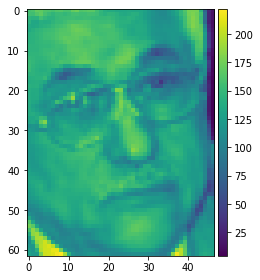

In [ ]:
imshow(face[1])

[0.20544315 0.24189511 0.24189511 ... 0.04941198 0.02591512 0.28776517]


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


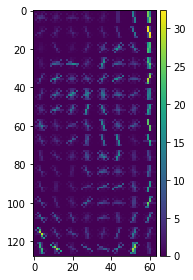

In [ ]:
resized_img = resize(face[1],(128, 64))
fd_0, hog_img_0 = hog(resized_img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2,2), visualize=True)
print(fd_0)
imshow(hog_img_0)

# **Getting example converted into HOG**

In [ ]:
resized_img = resize(face[2],(128, 64))
fd_1, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2,2), visualize=True)
print(fd_1)

[0.39832236 0.39832236 0.00398809 ... 0.         0.         0.38671037]


In [ ]:
fd_1.shape

(3780,)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


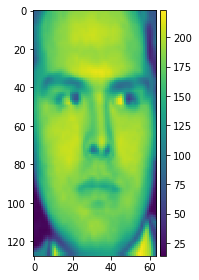

In [ ]:
imshow(resized_img)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


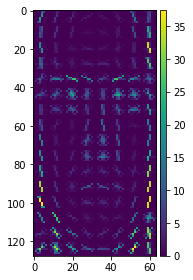

In [ ]:
imshow(hog_img)

# **Partition into train and test data and then passing both the arrays from HOG feature extraction**

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
data = []
for i in range(0,13233):
  resized_img = resize(face[i],(64,32))
  fd_data, hog_img=hog(resized_img, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2,2), visualize=True)
  data.append(fd_data)
  

In [7]:
data_high_dimension = []
for i in range(0,13233):
  resized_img1 = resize(face[i],(128, 64))
  fd_data1, hog_img1=hog(resized_img1, orientations=9, pixels_per_cell=(8,8),
                  cells_per_block=(2,2), visualize=True)
  data_high_dimension.append(fd_data1)

In [8]:
import numpy as np
data = np.array(data)

In [9]:
data_high_dimension = np.array(data_high_dimension)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, faces.target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9263, 756)
(3970, 756)
(9263,)
(3970,)


In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_high_dimension, faces.target, test_size=0.3)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(9263, 3780)
(3970, 3780)
(9263,)
(3970,)


In [ ]:
#X_train = X_train.reshape(9263,512)
#X_test = X_test.reshape(3970, 512)

# **Working on training and testing on SVM classifier with 64x32 image size**

In [12]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [13]:
from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)
predicted = model.predict(X_test)
score = accuracy_score(y_test, predicted)
print(score)

0.19068010075566752


# **Working on training and testing on SVM classifier with 128x64 image size**: 

In [14]:
model1 = LinearSVC()
from sklearn.metrics import accuracy_score
model1.fit(X_train1, y_train1)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
predicted1 = model1.predict(X_test1)
score1 = accuracy_score(y_test1, predicted1)
print(score1)

0.25642317380352647


# **Working on training and testing on KNN model with 128x64 image size**: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
predicted_knn = model_knn.predict(X_test1)
score_knn = accuracy_score(y_test1, predicted_knn)
print(score_knn)

0.1544080604534005


# **Performance Metrics**: 

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
print(predicted.shape)
print(predicted1.shape)
#print(predicted_knn.shape)

(3970,)
(3970,)


In [18]:
from nltk import FreqDist
f_d = FreqDist(y_test1)
for word, frequency in f_d.most_common(10):
  print(u'{}\t{}'.format(word, frequency))

1871	160
1047	82
5458	44
1892	32
1404	31
2175	25
373	22
2453	21
385	18
1933	17


In [19]:
TP_1871 = 0
FN_1871 = 0
FP_1871 = 0
TN_1871 = 0
for i in range(0,3969):
  if predicted1[i] == y_test1[i] and predicted1[i] == 1871:
    TP_1871 = TP_1871+1
  elif predicted1[i] == y_test1[i] and y_test1[i] != 1871:
    TN_1871 = TN_1871+1
  elif predicted1[i] != y_test1[i] and y_test1[i] == 1871:
    FN_1871 = FN_1871+1
  elif predicted1[i] == y_test1[i] and predicted1[i] != 1871:
    FP_1871 = FP_1871+1

In [22]:
FPR = FP_1871/(FP_1871+TN_1871)
TPR = TP_1871/(TP_1871+FN_1871)
print('FPR', FPR, 'TPR', TPR)

FPR 0.0 TPR 0.875


In [28]:
print('TP_1871-',TP_1871,' | ', 'TP_1047-',TP_1047)
print('FN_1871-',FN_1871,'  | ', 'FN_1047-',FN_1047)
print('FP_1871-',FP_1871,'   | ', 'FP_1047-',FP_1047)
print('TN_1871-',TN_1871,' | ', 'TN_1047-',TN_1047)

TP_1871- 140  |  TP_1047- 70
FN_1871- 20   |  FN_1047- 12
FP_1871- 0    |  FP_1047- 0
TN_1871- 877  |  TN_1047- 947


In [25]:
TP_1047 = 0
FN_1047 = 0
FP_1047 = 0
TN_1047 = 0
for i in range(0,3969):
  if predicted1[i] == y_test1[i] and predicted1[i] == 1047:
    TP_1047 = TP_1047+1
  elif predicted1[i] == y_test1[i] and y_test1[i] != 1047:
    TN_1047 = TN_1047+1
  elif predicted1[i] != y_test1[i] and y_test1[i] == 1047:
    FN_1047 = FN_1047+1
  elif predicted1[i] == y_test1[i] and predicted1[i] != 1047:
    FP_1047 = FP_1047+1
FPR = FP_1047/(FP_1047+TN_1047)
TPR = TP_1047/(TP_1047+FN_1047)
print('FPR', FPR, 'TPR', TPR)
print(TP_1047)
print(FN_1047)
print(FP_1047)
print(TN_1047)


FPR 0.0 TPR 0.8536585365853658
70
12
0
947


# **HOG Implimentation**

Here I have just tried an implentation of HOG example on House.jpg image for practise purpose


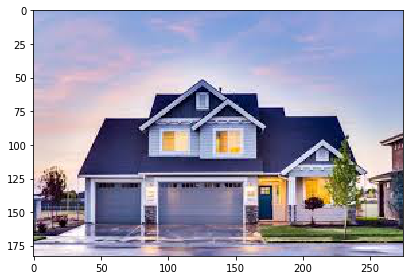

In [ ]:
img = imread('House.jpeg')
imshow(img)

In [ ]:
img.shape

(183, 275, 3)

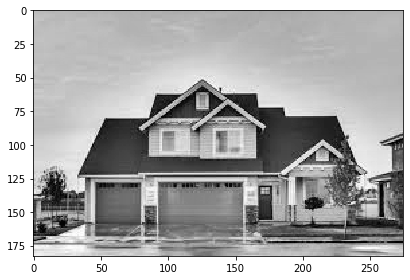

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)

In [ ]:
print(img.shape)
print(img)
img = img.astype(int)

(183, 275)
[[188 188 187 ... 179 179 179]
 [188 188 187 ... 178 178 178]
 [189 189 189 ... 179 179 179]
 ...
 [224 226 230 ... 202 202 202]
 [233 235 238 ... 192 192 191]
 [236 238 240 ... 192 192 191]]


In [ ]:
img_fin = resize(img, (128,128))

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


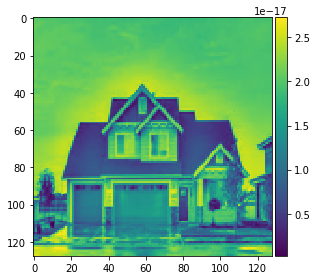

In [ ]:
imshow(img_fin)

In [ ]:
fd, hog_image = hog(img_fin, orientations=30, pixels_per_cell=(8, 8),
cells_per_block=(2, 2), visualize=True)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


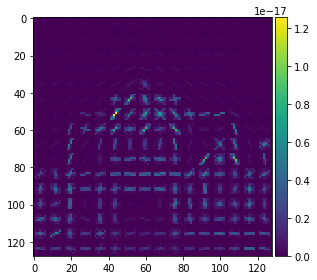

In [ ]:
imshow(hog_image)